# LC Circuits

### We have connected an inductor in a circuit with a capacitor as shown below:

<img src="LCcir.jpg">

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

* Mathematical model for inductor gives: 


\begin{equation}
V_c(t) = L * i'(t)
\end{equation}

*According to Kirchoff's voltage law,*


\begin{equation}
V_L(t) + V_c(t) = 0
\end{equation}


*From (1) and (2) we get differential equation for current,* 



\begin{equation}
i'(t) = \frac{-V_c(t)}{L}
\end{equation}


*From the capacitor model we get the second differential equation,*


\begin{equation}
V_c^{'}(t) = \frac{i(t)}{C}
\end{equation}


*Applying Euler Method to find the Numerical Solution*

\begin{equation}
\frac{V_c(t+1)- V_c(t)}{{\mathit{\Delta}}t }  = \frac{i(t)}{C}
\end{equation}

\begin{equation}
V_c(t+1) = V_c(t) + {\mathit{\Delta}}t * \Big(\frac{i(t)}{C}\Big)
\end{equation}

*Similarly applying Euler Method to the Current Equation*

\begin{equation}
\frac{i(t+1)- i(t)}{{\mathit{\Delta}}t } = \frac{-V_c(t)}{L}
\end{equation}

\begin{equation}
i(t+1) = i(t) + {\mathit{\Delta}}t * \Big(\frac{-V_c(t)}{L}\Big)
\end{equation}


## Solution using numerical method

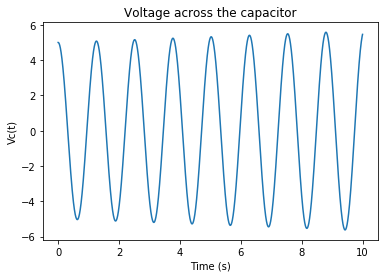

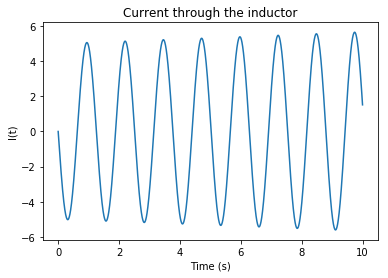

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = 0.2
C = 0.2
t = np.arange(0, 10, 0.001)
Vc = np.zeros(len(t))
Il = np.zeros(len(t))
Vc[0] = 5
Il[0] = 0
delta = 0.001

for i in range(1,len(t)):
    Vc[i] = Vc[i-1] + (Il[i-1] * delta)/C
    Il[i] = Il[i-1] - (Vc[i-1] * delta)/L

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the inductor')
plt.show()

## Using FFT

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


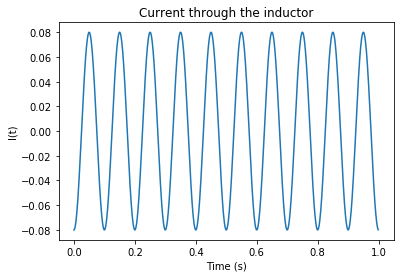

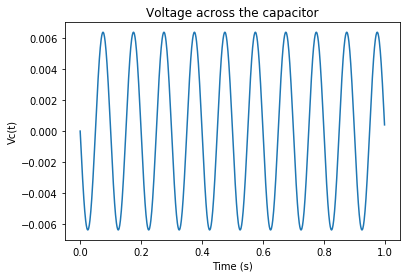

In [4]:
# with an AC Source
from numpy.fft import fft
from numpy.fft import ifft

L = 0.2
C = 0.2
T = 1
t = np.arange(0, T, 0.001)

Vs = np.sin(2 * np.pi * 10 * t)

delta = 0.001

#Applying FFT
N = len(t)
W = np.zeros(N)
W[0 : N/2+1] = 2 * np.pi / T * np.arange(0, N/2+1)
W[N/2+1 : N] = 2 * np.pi / T * np.arange(-(N/2-1), 0)

Il =  ifft(fft(Vs)/(L * 1j * W + 1/(C * 1j * W + 0.001)))
Vc = ifft((1/C) * fft(Il)/(1j * W + 0.001))

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the inductor')
plt.show()

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()